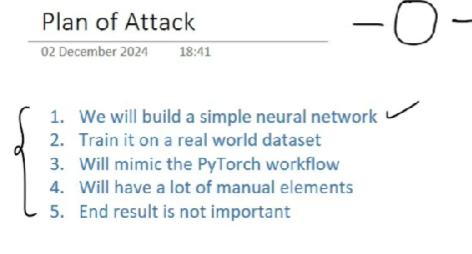

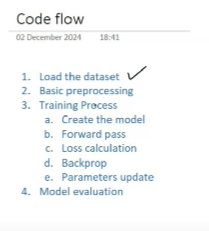

## Data Load and PreProcessing

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.61947407, -0.44905843, -0.63448367, ..., -0.38130483,
        -1.13496195, -1.30254466],
       [-0.49337882,  1.76592343, -0.43258254, ...,  0.46312358,
         0.51739651,  1.95930655],
       [-1.07621907, -1.06692179, -1.04236476, ..., -1.11023028,
        -0.77958033,  0.02832533],
       ...,
       [ 1.27475672, -0.39310099,  1.30295146, ...,  1.83808764,
         1.48722299,  0.40617314],
       [-0.08426981, -0.81511332, -0.0540689 , ...,  0.349416  ,
        -0.52217776,  1.01062122],
       [-0.42612803, -0.2065762 , -0.48642284, ..., -1.58852028,
        -0.66167335, -1.08678651]])

In [9]:
y_train

,diagnosis
275,B
193,M
345,B
140,B
525,B
...,...
22,M
288,B
45,M
73,M


### Label Encoding

In [10]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [11]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

### Numpy arrays to PyTorch tensors

In [12]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [13]:
X_train_tensor.shape

torch.Size([455, 30])

In [14]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

In [15]:
class MySimpleNN():

  def __init__(self, X):

    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss





### Important Parameters

In [16]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [17]:
# create model
model = MySimpleNN(X_train_tensor)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.5115325058857234
Epoch: 2, Loss: 3.3783385980278324
Epoch: 3, Loss: 3.237088292834883
Epoch: 4, Loss: 3.0859228462983714
Epoch: 5, Loss: 2.93168449582591
Epoch: 6, Loss: 2.7740279863220354
Epoch: 7, Loss: 2.6134253111268797
Epoch: 8, Loss: 2.4514070508458414
Epoch: 9, Loss: 2.290281713283227
Epoch: 10, Loss: 2.1248410831208244
Epoch: 11, Loss: 1.9640603129205898
Epoch: 12, Loss: 1.8105319607488652
Epoch: 13, Loss: 1.663265312668382
Epoch: 14, Loss: 1.5220563997896515
Epoch: 15, Loss: 1.389404590353537
Epoch: 16, Loss: 1.2715226861050766
Epoch: 17, Loss: 1.1697551270108986
Epoch: 18, Loss: 1.0847202389775725
Epoch: 19, Loss: 1.0146726395071153
Epoch: 20, Loss: 0.9580490440638844
Epoch: 21, Loss: 0.9139132296385071
Epoch: 22, Loss: 0.8795733977639842
Epoch: 23, Loss: 0.8526243722651254
Epoch: 24, Loss: 0.8311544000796147
Epoch: 25, Loss: 0.8137443334402572


In [19]:
model.weights

tensor([[-0.3395],
        [ 0.0307],
        [-0.2575],
        [-0.0971],
        [-0.0830],
        [ 0.0958],
        [ 0.0752],
        [ 0.2203],
        [-0.0561],
        [-0.3246],
        [ 0.2749],
        [ 0.1839],
        [-0.2416],
        [ 0.4732],
        [ 0.0452],
        [-0.3564],
        [ 0.5514],
        [-0.2913],
        [ 0.3975],
        [ 0.4590],
        [ 0.4396],
        [-0.0815],
        [-0.1214],
        [-0.0217],
        [ 0.1701],
        [-0.3055],
        [ 0.1767],
        [-0.5307],
        [ 0.3805],
        [ 0.4256]], dtype=torch.float64, requires_grad=True)

In [18]:
model.bias

tensor([-0.1238], dtype=torch.float64, requires_grad=True)

### Evaluation

In [20]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.6305016875267029
